# <center>**<font style="color:rgb(100,109,254)">Image Processing Session 3 </font>**</center>
## Content
1. Preparing your Environment.
2. Hough Transform.
3. Contours.
4. Kmeans Clustering.

## **<font style="color:rgb(134,19,348)">Virtual Environment </font>**

Virtual environments are essential tools in Python development that allow you to create isolated spaces for your projects. These environments help you manage dependencies and prevent conflicts between different projects.

A virtual environment is an isolated environment that allows you to run specific versions of Python and its packages without interfering with other projects on your system. By creating a virtual environment, you can maintain different dependencies for different projects, which is especially useful when working with multiple projects that require different versions of libraries or Python itself.



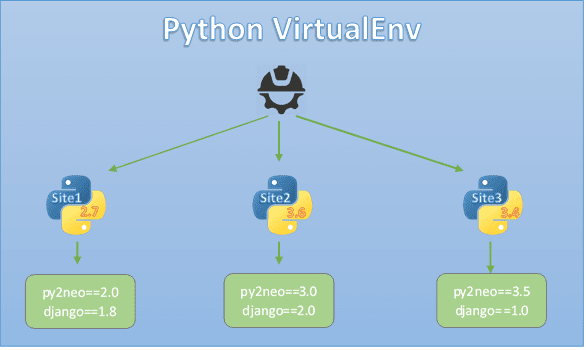

### Creating a Conda Environment:

```bash
# Create a new Conda environment with a specific Python version
conda create --name myenv python=3.9

# Activate the Conda environment
activate myenv

# Install packages within the Conda environment
pip install numpy pandas

# Deactivate the Conda environment
deactivate

# Remove the Conda environment
conda env remove --name myenv

---

* `Importing Libraries`

In [20]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Image session 3'

* `Creating necessary functions for Viz`

In [21]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        image = images[i]
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

def display_image(image, title='original', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()

def display2Images(img1, img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()


# **<font style="color:rgb(100,109,254)">Hough Transform </font>**

## 1. Line Detection using Hough Transform

The Hough Line Transform is used to detect lines in an image. The idea is to transform points in the Cartesian coordinate system into the Hough space using the polar coordinate system.

#### How does it work?
As you know, a line in the image space can be expressed with two variables. For example:

1. In the Cartesian coordinate system: Parameters: `(m,b)`.
2. In the Polar coordinate system: Parameters: `(r,θ)`



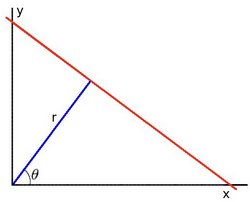

<b>Check this -> https://hackthedeveloper.com/line-detection-opencv-python/</b><br>
<b>Check documentation -> https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html</b><br>
<b>Implementation -> https://sbme-tutorials.github.io/2021/cv/notes/4_week4.html</b>

(50, 1, 4)
[[210 441 210 265]]
[[321 427 536 427]]
[[323 289 544 289]]
[[ 28 261 206 261]]
[[317 385 547 385]]
[[317 417 480 417]]
[[500  51 586 200]]
[[408 201 495  51]]
[[ 29 445 206 445]]
[[509 196 583 196]]
[[ 25 439  25 329]]
[[547 424 547 292]]
[[262 205 367 205]]
[[316 359 536 359]]
[[316 299 476 297]]
[[367  23 419 113]]
[[267  21 363  21]]
[[209 115 260 203]]
[[108 343 191 343]]
[[315 196 374 195]]
[[505 401 505 298]]
[[107 436 199 436]]
[[316 316 317 425]]
[[493 358 493 297]]
[[209 112 261  22]]
[[408 203 496  51]]
[[536 401 536 298]]
[[368 204 419 116]]
[[ 34 333  34 271]]
[[328 416 328 298]]
[[489 210 545 211]]
[[ 26 328  26 263]]
[[200 434 200 344]]
[[ 97 333  97 271]]
[[541 142 578 207]]
[[106 345 107 434]]
[[428 208 467 141]]
[[324 116 416 120]]
[[ 36 270  95 270]]
[[267 113 315 195]]
[[482 401 535 401]]
[[482 117 530 159]]
[[210 109 259  24]]
[[499 211 545 131]]
[[ 35 333  96 333]]
[[484 116 549 138]]
[[411 207 466 207]]
[[469 206 469 139]]
[[176 278 177 322]]
[[ 53  28

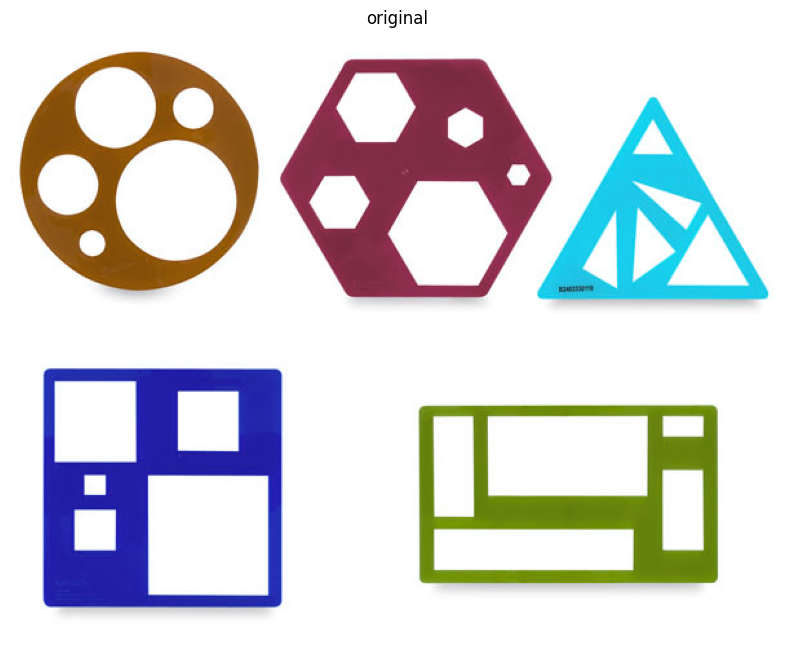

In [14]:
# Applying the Algorithm
img = cv.imread("./assets/shapes.jpg")
img_copy = img.copy()
gray = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 2, 80)

lines = cv.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=40, maxLineGap=30)

print(lines.shape)
for line in lines:
    print(line)
    x0, y0, x1, y1 = line[0]
    cv.line(img_copy, (x0, y0), (x1, y1), (0,0,255), 3, cv.LINE_AA)

display_image(img)


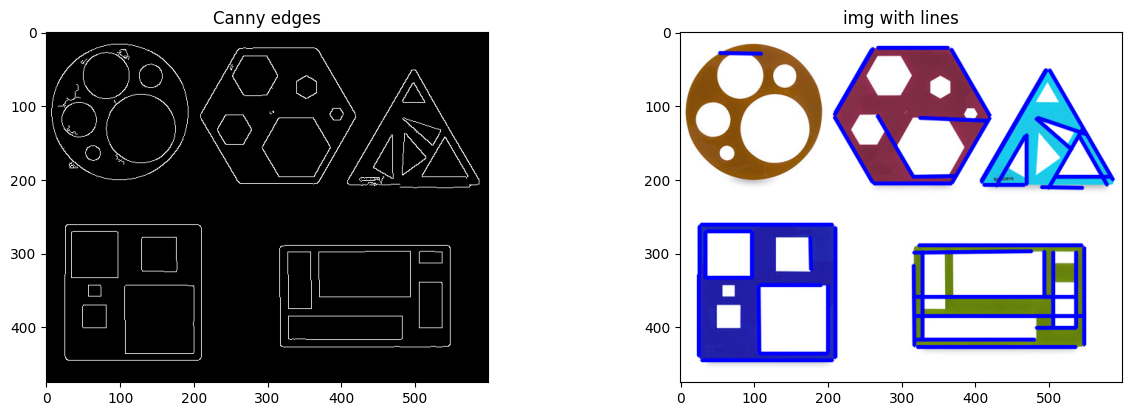

In [15]:
# SHOW IMAGES IN DIFFERENT FORMATS
images = [edges, img_copy]
titles = ["Canny edges", "img with lines"]
plots = [2, 2]
size = (15, 10)
make_fig_gray(images, titles, plots, size)

## 2. Circle Detection using hough transform

- The Hough Circle Transform works in almost similar way to the Hough Line Transform explained in the previous section.
- In the line detection case, a line was defined by two parameters `(r,θ)`. In the circle case, we need three parameters to define a circle: <br> `C:(xcenter,ycenter,r)`

<b>Check documenation: 
- https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html<br>
- https://docs.opencv.org/4.x/d3/de5/tutorial_js_houghcircles.html</b>


In [13]:
# Apply the algorithm
img = cv.imread("./assets/shapes.jpg")
img_copy = img.copy()
# blur = cv.GaussianBlur(img_copy, (3,3), 100)
gray = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray, method=cv.HOUGH_GRADIENT, dp=1, minDist=20, 
                        param1=100, param2=45, minRadius=1, maxRadius=200)

print(circles.shape)
print(circles)
if circles is not None:
    circles = np.uint16(np.around(circles))
    print(circles)

    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        # draw the outer circle
        cv.circle(img_copy, center, radius, (0, 255, 0), 3)
        # draw circle center
        cv.circle(img_copy, center, 3, (255, 0, 0), 2)

(1, 6, 3)
[[[ 99.5 107.5  92.2]
  [127.5 130.5  46.3]
  [ 80.5  59.5  31.3]
  [ 44.5 117.5  23.3]
  [141.5  58.5  15.6]
  [ 63.5 163.5  10.2]]]
[[[100 108  92]
  [128 130  46]
  [ 80  60  31]
  [ 44 118  23]
  [142  58  16]
  [ 64 164  10]]]


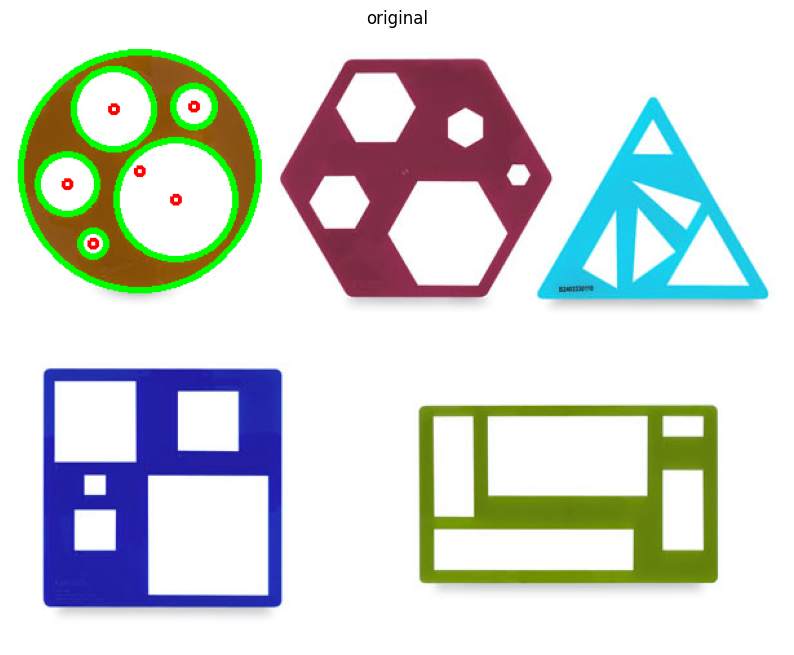

In [14]:
# SHOW IMAGES IN DIFFERENT FORMATS
display_image(img_copy)

---

# **<font style="color:rgb(100,109,254)">Contours </font>**

Contour detection is a popular computer vision technique used for analyzing objects in an image. Contours are a useful tool for shape analysis, object detection and recognition.

<br>
A contour can be simply defined as a curve that joins a set of points enclosing an area having the same color or intensity. This area of uniform color or intensity forms the object that we are trying to detect, and the curve enclosing this area is the contour representing the shape of the object. So essentially, contour detection works similarly to edge-detection but with the restriction that the edges detected must form a closed path. 

In OpenCV contour detection can be performed with the help of function **`cv.findContours()`** which we will discuss below along with the other important steps you need to perform to effectively detect the contours.

## **<font style="color:rgb(134,19,348)"> Detecting contours in an image </font>**
OpenCV saves us the trouble of having to write lengthy algorithms for contour detection and provides a handy function **`findContours()`**.

The **`findContours()`** functions takes a binary image as input. The foreground is assumed to be white, and the background is assumed to be black. If that is not the case, then you can invert the image using the [**```cv.bitwise_not()```**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f) function.

<b>Check Documentation -> https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html</b>


#### **Function Syntax:**


> [**```contours, hierarchy =   cv.findContours(image, mode, method, contours, hierarchy, offset)```**](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a)

**Parameters:**

* **```image```** - It is the input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary. You can use compare, inRange, threshold, adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one.

* **```mode```** - It is the contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST,  RETR_TREE, RETR_CCOMP )

* **```method```** - It is the contour approximation method. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE)

* **```offset```** - It is the optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI, and then they should be analyzed in the whole image context.

**Returns:**

* **```contours```** - It is the detected contours. Each contour is stored as a vector of points.

* **```hierarchy```** - It is the optional output vector containing information about the image topology.

<br>


## **<font style="color:rgb(134,19,348)">Visualizing the contours detected</font>**
As you can see the **`cv.findContours()`** function was able to correctly detect the 5 external shapes in the image. But to visualize these results we can use the **`cv.drawContours()`** function which simply draws the contours onto an image.

#### **Function Syntax:**


> [**```cv.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)```**](https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)

**Parameters:**

* **```image```** - It is the image on which contours are to be drawn.
* **```contours```** -  It is point vector(s) representing the contour(s). It is usually an array of contours.
* **```contourIdx```** - It is the parameter, indicating a contour to draw. If it is negative, all the contours are drawn.
* **```color```** - It is the color of the contours.
* **```thickness```** - It is the thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
* **```lineType```** -  It is the type of line. You can find the possible options [here](https://docs.opencv.org/3.4/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777).
* **```hierarchy```** - It is the optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
* **```maxLevel```** -  It is the maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is a hierarchy available.
* **```offset```** - It is the optional contour shift parameter. Shift all the drawn contours by the specified offset=(dx, dy).

To prevent the original image from being overwritten, we use **`np.copy()`** for drawing the contours on a copy of the image.

#### Note:
Thresholding works out well for simple images with fewer variations in colors, however, for complex images, it's not always easy to do background-foreground segmentation using thresholding. In these cases creating the binary image using edge detection yields better results. 

In [32]:
# Create Mask of contours
img = cv.imread('./assets/shapes.jpg')
img_copy = img.copy()

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
canny = cv.Canny(gray, 2, 80)

# Apply detection
contours, hierarchy = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img_copy, contours, -1, (255, 0, 0), 3)

print(f"Number of contours {len(contours)}")
print(contours[0])

Number of contours 11
[[[323 289]]

 [[322 290]]

 [[321 290]]

 ...

 [[326 289]]

 [[325 289]]

 [[324 289]]]


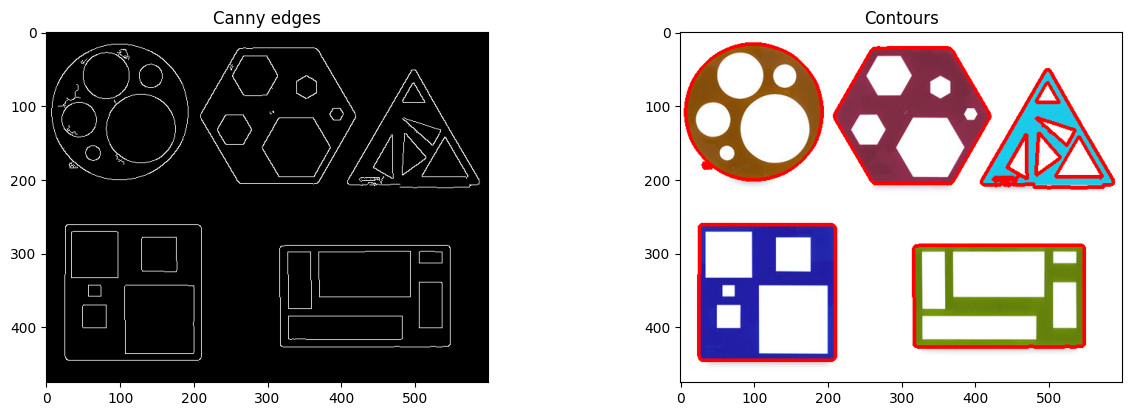

In [33]:
# SHOW IMAGES IN DIFFERENT FORMATS
images = [canny, img_copy]
titles = ["Canny edges", "Contours"]
plots = [2, 2]
size = (15, 10)
make_fig_gray(images, titles, plots, size)

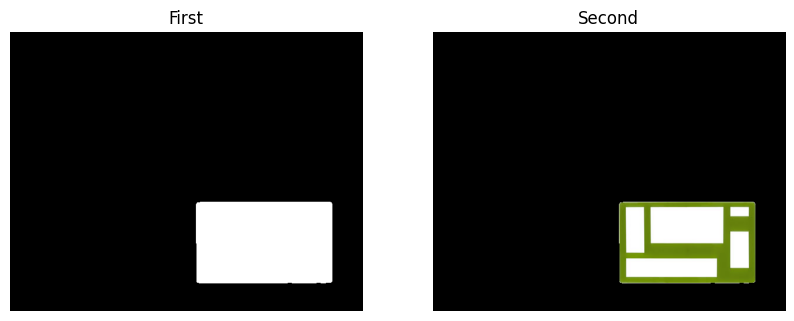

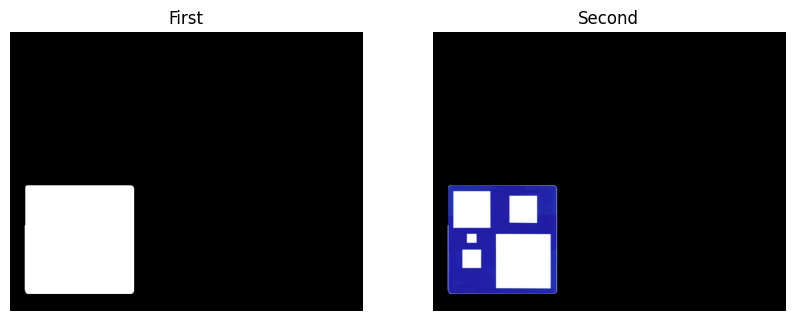

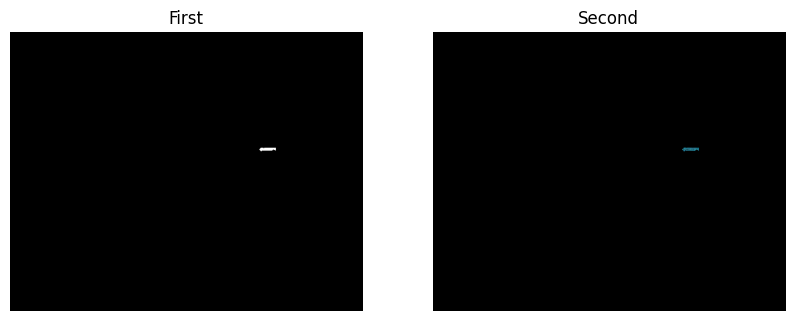

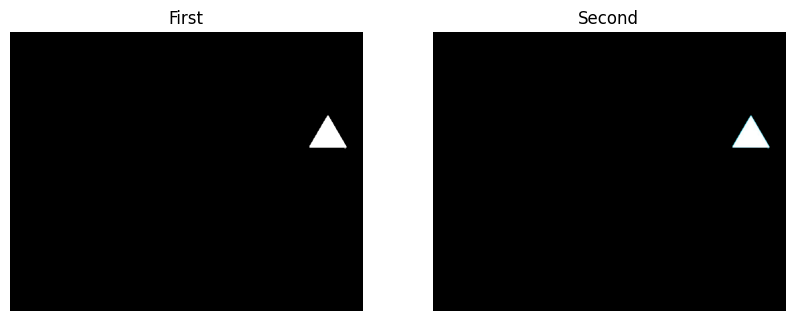

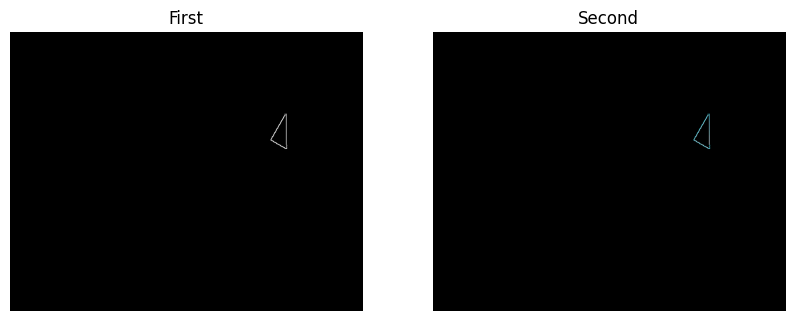

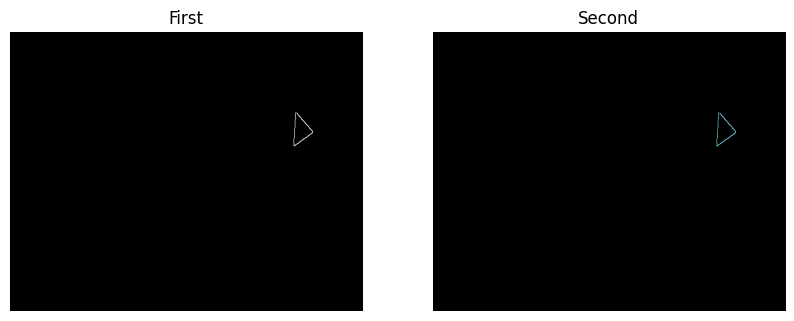

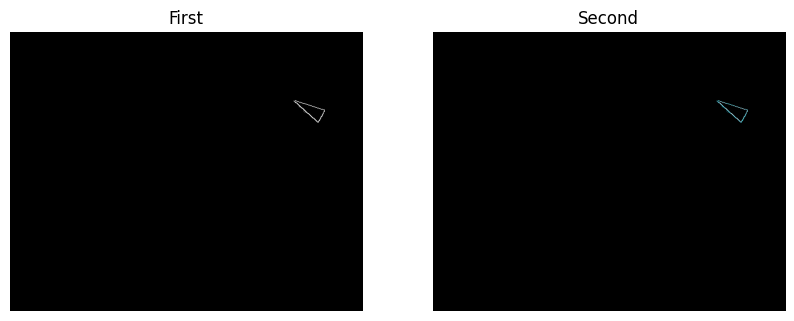

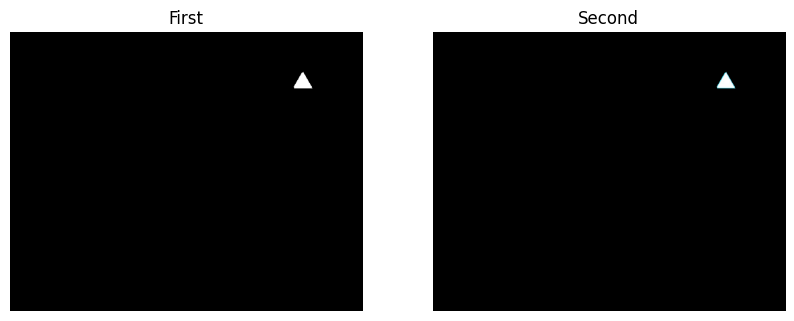

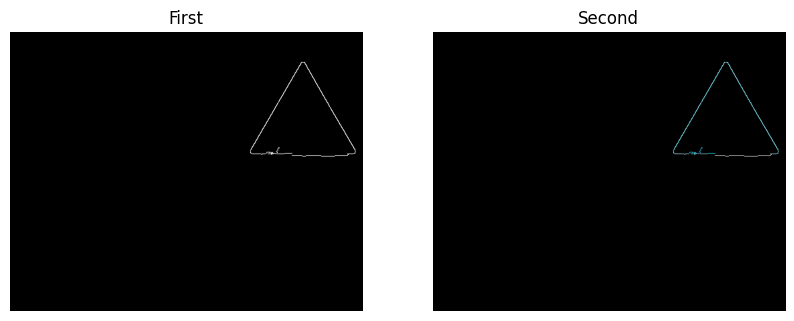

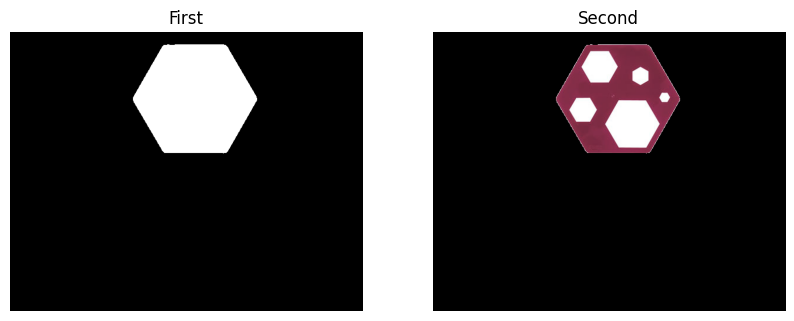

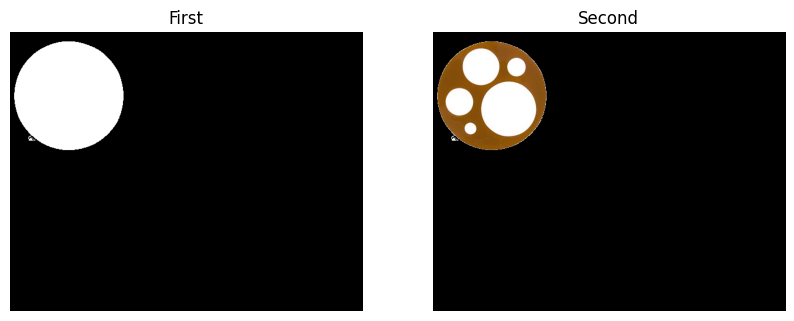

In [29]:
# Create masks and draw each contour alone 
for contour in contours:
    # Create empty mask
    mask = np.zeros(img.shape[:2], np.uint8)
    
    # Draw each contour on mask
    cv.drawContours(mask, [contour],-1, 255, -1)

    # Apply mask to image
    masked = cv.bitwise_and(img, img, mask=mask)

    display2Images(mask, masked)

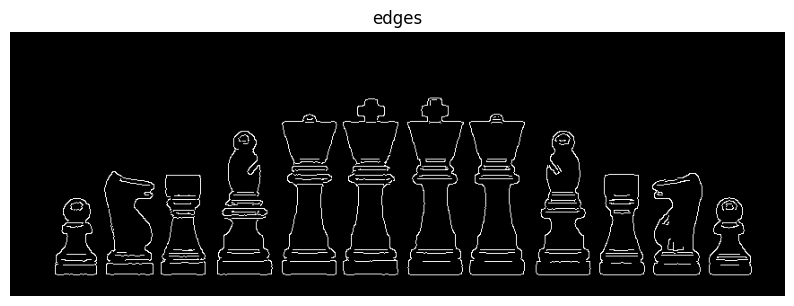

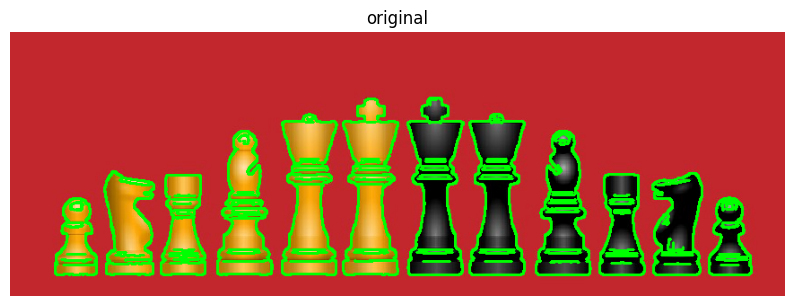

In [4]:
# Read the image
image = cv.imread('./assets/chess.jpg') 

# Blur the image to remove noise
blurred_image = cv.GaussianBlur(image.copy(), (5,5), 0)

# Apply canny edge detection
edges = cv.Canny(blurred_image, 100, 160)

# detecting contours
contours, _ = cv.findContours(edges, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

# Draw the contours
image_copy = image.copy()
cv.drawContours(image_copy, contours, -1, (0, 255, 0), 2)

# Display the image
display_image(edges, title='edges')
display_image(image_copy, colored=1)

In comparison, if we were to use thresholding as before it would yield poor result that will only manage to correctly outline half of the chess pieces in the image at a time. So for a fair comparison, we will use [**`cv.adaptiveThreshold()`**](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3) to perform adaptive thresholding which adjusts to different color intensities in the image.

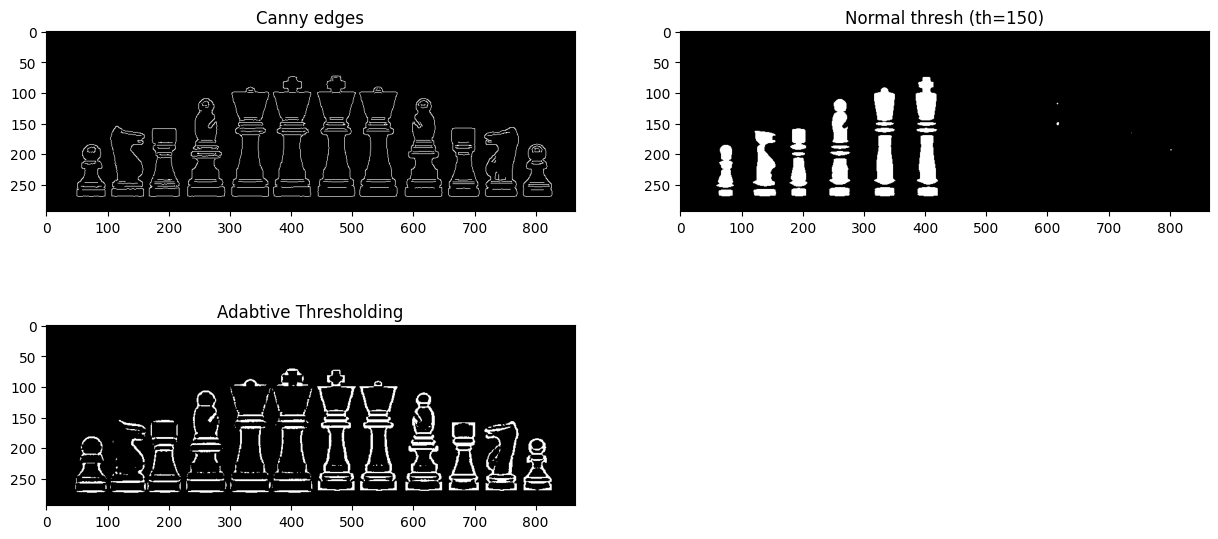

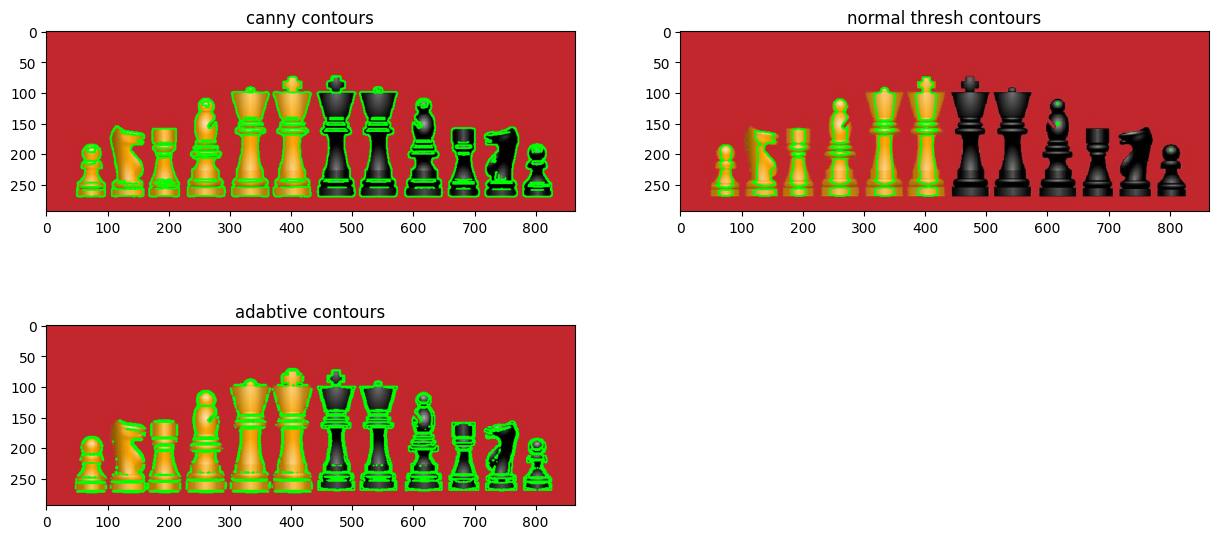

In [10]:
# Read the image
image = cv.imread('./assets/chess.jpg') 

# Blur the image to remove noise
blurred_image = cv.GaussianBlur(image, (5,5), 0)

gray = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Perform adaptive and normal thresholding 
_, thresh = cv.threshold(gray,150, 255, cv.THRESH_BINARY)
threshA = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 5)

## detecting contours in normal thershold
contours, _ = cv.findContours(thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
# Draw the contours
image1_copy = image.copy()
cv.drawContours(image1_copy, contours, -1, (0, 255, 0), 2)

## detecting contours in Adabtive thershold
contours, _ = cv.findContours(threshA, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
# Draw the contours
image2_copy = image.copy()
cv.drawContours(image2_copy, contours, -1, (0, 255, 0), 2)


# SHOW IMAGES IN DIFFERENT FORMATS
images = [edges, thresh, threshA]
titles = ["Canny edges",  "Normal thresh (th=150)",  "Adabtive Thresholding"]
plots = [2, 2]
size = (15, 7)
make_fig_gray(images, titles, plots, size)

# SHOW IMAGES IN DIFFERENT FORMATS
images = [image_copy, image1_copy, image2_copy]
titles = ["canny contours", "normal thresh contours", "adabtive contours"]
plots = [2, 2]
size = (15, 7)
make_fig(images, titles, plots, size)

---

# **<font style="color:rgb(100,109,254)">Kmeans Clustering</font>**

<b>K-Means Clustering</b> is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters. It assigns data points to one of the K clusters depending on their distance from the center of the clusters.

#### The algorithm works as follows:  

1. First, we randomly initialize k points, called means or cluster centroids.
2. We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

#### <b>Check Documentation -> https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html </b>

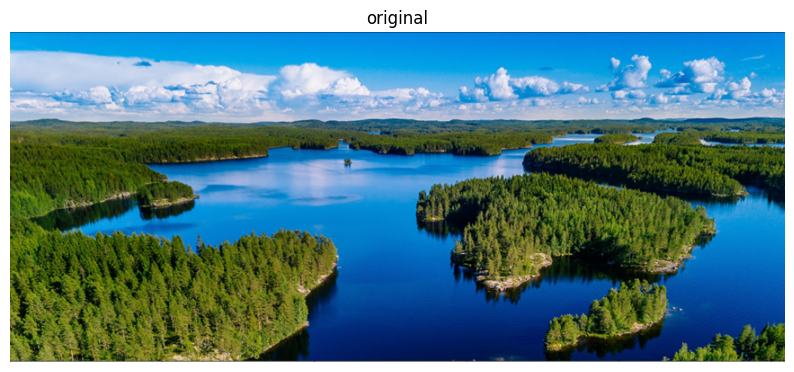

In [34]:
# Read the image
img = cv.imread('./assets/nature.PNG')
# Convert to RGB
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display_image(img, colored=1)

In [35]:
img.shape

(588, 1381, 3)

In [68]:
# Reshape the image to a 2D array of pixels and 3 colors values(RGB)
pixel_values = img.reshape((-1, 3))

# Convert to float
pixel_values = np.float32(pixel_values)

pixel_values.shape, 588*1381

((812028, 3), 812028)

In [58]:
# Define Stopping Criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [75]:
# Number of clusters k
k = 2
compactness, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [76]:
# convert back to 8 bit values
centers = np.uint8(centers)

print(labels.shape)
# Flatten the labels array
labels = labels.flatten()
print(labels.shape)
labels

(812028, 1)
(812028,)


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [77]:
np.unique(labels)

array([0, 1], dtype=int32)

In [78]:
# Convert all pixels to the color of the centroids
segmented_img = centers[labels]
segmented_img.shape

(812028, 3)

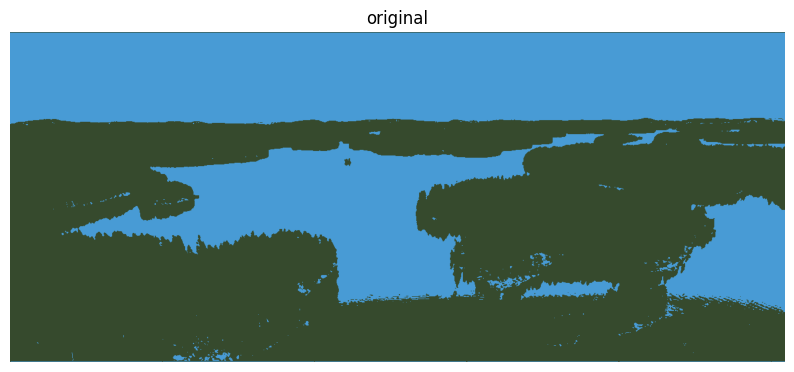

(588, 1381, 3)

In [79]:
# Reshape back to the original dimension
segmented_img = segmented_img.reshape(img.shape)

# Show the image
display_image(segmented_img, colored=1)
segmented_img.shape

In [43]:
def get_clusters(image, k=2):
    pixel_values = pixel_values = img.reshape((-1, 3)).astype(np.float32)

    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_img = centers[labels.flatten()]
    segmented_img = segmented_img.reshape(img.shape)

    return segmented_img, labels

In [44]:
def remove_cluster(image, labels, cluster):
    """Create a masked image by disabling a specific cluster."""
    masked_image = np.copy(image)
    masked_image = masked_image.reshape((-1, 3))

    masked_image[labels == cluster] = 0
    masked_image = masked_image.reshape(image.shape)
    return masked_image

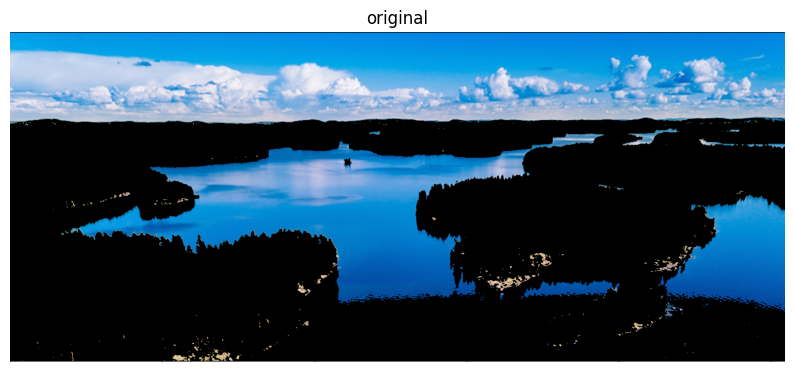

In [85]:
seg, labels = get_clusters(img)
rem = remove_cluster(img, labels, 1)
display_image(rem, colored=1)

### More Explaining on KMeans
<b>https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python</b>

---

Youssef Kamel 🥰
